In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
import numpy as np

import torch
import random
import math
import json

from tqdm import tqdm_notebook
from boltons.iterutils import pairwise
from scipy.stats import kendalltau
from itertools import permutations

from sent_order.models.kt_regression import SentenceEncoder, Regressor, Corpus
from sent_order.perms import sample_uniform_perms

In [3]:
sent_encoder = torch.load(
    '../../data/models/new/kt-reg-clamp/sent_encoder.350.bin',
    map_location={'cuda:0': 'cpu'},
)

In [4]:
regressor = torch.load(
    '../../data/models/new/kt-reg-clamp/regressor.350.bin',
    map_location={'cuda:0': 'cpu'},
)

In [5]:
train = Corpus('../../data/dev.json/', 10000)

100%|██████████| 10000/10000 [00:01<00:00, 7170.49it/s]


In [6]:
grafs = [g for g in train.grafs if len(g.sentences) == 7]

In [7]:
len(grafs)

948

In [17]:
graf = random.choice(grafs)

In [18]:
[' '.join(s.tokens) for s in graf.sentences]

['The intensity of classical bright solitons propagating in linearly coupled identical fibers can be distributed either in a stable symmetric state at strong coupling or in a stable asymmetric state if the coupling is small enough .',
 'In the first case , if the initial state is not the equilibrium state , the intensity may switch periodically from fiber to fiber , while in the second case the a - symmetrical state remains forever , with most of its energy in either fiber .',
 'The latter situation makes a state of propagation with two exactly reciprocal realizations .',
 'In the quantum case , such a situation does not exist as an eigenstate because of the quantum tunneling between the two fibers .',
 'Such a tunneling is a purely quantum phenomenon which does not not exist in the classical theory .',
 'We estimate the rate of tunneling by quantizing a simplified dynamics derived from the original Lagrangian equations with test functions .',
 'This tunneling could be within reach of 

In [19]:
sents = sent_encoder(graf.sentence_variables())

In [20]:
sents

Variable containing:
 1.0262e-01  1.8586e-04  3.0257e-04  ...  -7.6393e-04 -2.5339e-02  5.0528e-04
 7.6095e-02 -1.5197e-05  9.1684e-04  ...   6.8201e-02 -8.2766e-04 -3.1388e-03
-6.2993e-02  1.1813e-05 -6.6263e-03  ...  -1.4749e-01  8.6306e-04  2.5720e-04
                ...                   ⋱                   ...                
 7.2695e-02  3.7576e-03 -1.1928e-04  ...  -2.4107e-02 -2.9002e-02  1.1933e-08
-7.5303e-01  2.7538e-06  3.4264e-03  ...   1.9997e-02 -1.0623e-01 -1.6748e-06
 3.6541e-02  9.1731e-03  2.7570e-02  ...  -3.2264e-03 -2.6610e-04  5.2052e-06
[torch.FloatTensor of size 7x1000]

In [21]:
perms = list(permutations(range(7)))

In [22]:
x = []
kts = []
for perm in tqdm_notebook(perms):
    
    sort = torch.LongTensor(perm)
    x.append(sents[sort])
    
    kt = kendalltau(perm, range(7)).correlation
    kts.append(kt)

HBox(children=(IntProgress(value=0, max=5040), HTML(value='')))

In [23]:
x = torch.stack(x)
y = regressor(x)

In [24]:
y = (1-y)*2-1

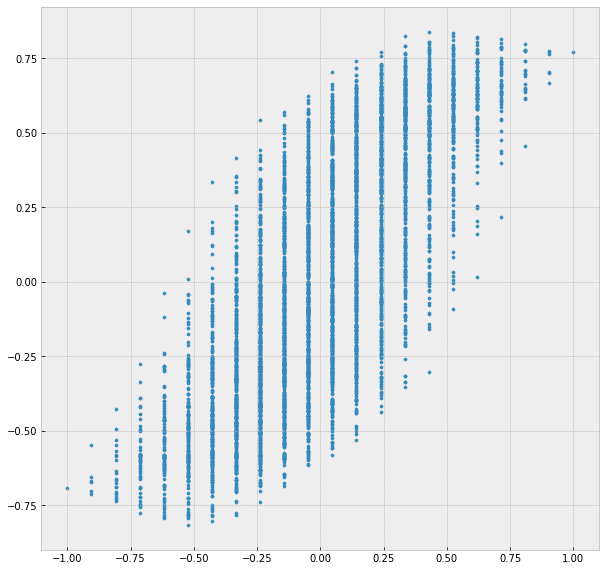

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(kts, y.data.tolist(), s=10)